# LOGISTIC REGRESSION 

# Import modules

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score

# Data Preprocessing

In [2]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)
dta = dta.rename(columns={"rate_marriage": "rateMarriage", "yrs_married": "yearsMarried","occupation_husb":"husbandOccupation"})

dta.sample(10)

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs,affair
4694,4.0,27.0,9.0,1.0,3.0,12.0,3.0,3.0,0.000000,0
274,4.0,32.0,16.5,3.0,4.0,12.0,3.0,5.0,1.187878,1
5591,4.0,22.0,2.5,1.0,1.0,14.0,2.0,5.0,0.000000,0
4893,5.0,32.0,16.5,2.0,2.0,12.0,3.0,5.0,0.000000,0
5575,5.0,32.0,13.0,2.0,2.0,14.0,5.0,4.0,0.000000,0
2902,4.0,32.0,16.5,4.0,4.0,16.0,4.0,4.0,0.000000,0
1233,4.0,27.0,9.0,2.0,1.0,17.0,4.0,5.0,2.177776,1
5224,3.0,37.0,23.0,3.0,3.0,12.0,5.0,5.0,0.000000,0
2671,5.0,32.0,13.0,3.0,2.0,20.0,3.0,6.0,0.000000,0
3890,5.0,17.5,0.5,0.0,3.0,12.0,3.0,1.0,0.000000,0


In [3]:
dta.tail()

,rateMarriage,age,yearsMarried,children,religious,educ,occupation,husbandOccupation,affairs,affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


# Data Visualization


In [4]:
%matplotlib inline

Text(0, 0.5, 'Frequency')

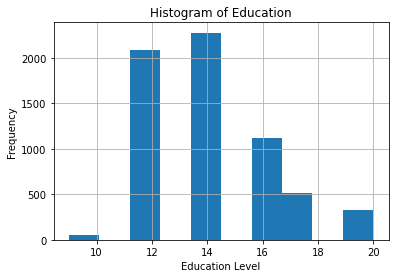

In [5]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

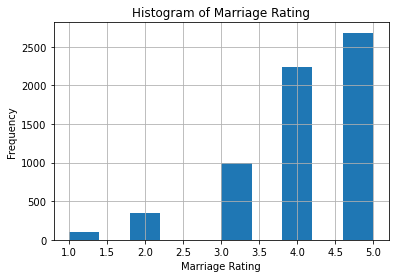

In [6]:
dta.rateMarriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

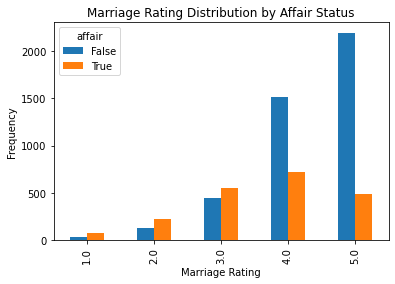

In [7]:
pd.crosstab(dta.rateMarriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

# create dataframes with an intercept column and dummy variables for  occupation and occupation_husb

In [8]:
y, X = dmatrices('affair ~ rateMarriage + age + yearsMarried + children + \
                  religious + educ + C(occupation) + C(husbandOccupation)',
                  dta, return_type="dataframe")
X.columns
X.head(5) 

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(husbandOccupation)[T.2.0],C(husbandOccupation)[T.3.0],C(husbandOccupation)[T.4.0],C(husbandOccupation)[T.5.0],C(husbandOccupation)[T.6.0],rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [9]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(husbandOccupation)[T.2.0]':'occ_husb_2',
                        'C(husbandOccupation)[T.3.0]':'occ_husb_3',
                        'C(husbandOccupation)[T.4.0]':'occ_husb_4',
                        'C(husbandOccupation)[T.5.0]':'occ_husb_5',
                        'C(husbandOccupation)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rateMarriage,age,yearsMarried,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
y = np.ravel(y)
print(y)

[1. 1. 1. ... 0. 0. 0.]


# Running logistic regression on the entire data set

In [22]:
#logistic regression model, and fit with X and y
model = LogisticRegression(max_iter=1000)
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.726358781024191

In [24]:
y.mean()

0.3224945020420987

# Logistic Regression on Test and Training set

In [25]:
#splitting the data-set into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
model2 = LogisticRegression(solver='lbfgs',max_iter=1000)
model2.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
predict = model2.predict(X_test)
print(y_test)
predict

[0. 0. 0. ... 1. 1. 1.]


array([1., 0., 0., ..., 0., 1., 1.])

In [34]:
prob = model2.predict_proba(X_test)
prob

array([[0.34799521, 0.65200479],
       [0.90996164, 0.09003836],
       [0.73478688, 0.26521312],
       ...,
       [0.77909111, 0.22090889],
       [0.37864467, 0.62135533],
       [0.36237731, 0.63762269]])

Classifier predicts 1 if probability is greater than 0.5 and 0 if probability is less than 0.5

In [35]:
print(metrics.accuracy_score(y_test, predict))

0.7349246231155779


In [36]:
print(metrics.roc_auc_score(y_test, prob[:, 1]))

0.7483499630450849


In [37]:
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1100
         1.0       0.62      0.36      0.45       492

    accuracy                           0.73      1592
   macro avg       0.69      0.63      0.64      1592
weighted avg       0.72      0.73      0.71      1592



In [30]:
y_pred = model2.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 1.]
 [1. 1.]
 [1. 1.]]


# Evaluating model using from 10 fold cross validation

In [39]:
scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, scoring='accuracy', cv=10)
scores
scores.mean()

0.7241661976837179

In [40]:
print(metrics.accuracy_score(y_test, y_pred))

0.7349246231155779
